# Global YouTube Statistics 2023 üåçüìä

This notebook provides a comprehensive analysis of YouTube statistics across the globe for the year 2023. We'll dive into trends across categories, engagement metrics, and country-based insights. The goal is to uncover meaningful patterns and trends in YouTube content and viewer preferences.

# Business Problems ü§î

Through a dataset containing 995 of the world's top YouTube channels, analyze the factors contributing to the success of a YouTube channel and user trends. Provide effective recommendations for those looking to build a personal YouTube channel in the future.

1. What are the relationships between different numerical variables related to YouTube channel metrics, such as views, subscribers, earnings, and rankings?

2. what are the number of channels created each year?

3. What is the distribution of YouTube channels in each category?

4. What are top 10 countries having the most youtube channels?

5. Who are the Top 10 YouTubers in terms of subscribers?

6. Does the content (characters) in the names of YouTube channels influence user views?

7. Does a higher number of subscribers on a YouTube channel imply higher views?

8. Does higher video views guarantee a higher income?

9. Does uploading tons of videos result in higher video views?



## Step 1: Import Libraries and Load Dataset

To begin, we import the necessary libraries and load our dataset.


In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
plt.style.use('ggplot')
sns.set_palette("tab10")

In [120]:
# suppress warning messages to keep your output clean and readable.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_csv('/Users/sakshiii/Desktop/Intro_to_python/Global_YouTube_Statistics.csv', encoding= 'unicode_escape')

df

rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por A√Ø¬ø     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation               youtubemovies        1   United States   
2       Entertainment                     MrBeast      741   United States   
3           Education  Cocomelon - Nursery Rhymes      966   United States   
4               Shows                   SET India   116536           India   
..                ...                         ...      ...             ...   
990            Sports               Natan por A√Ø¬ø     1200          Brazil   
991    People & Blogs    Free Fire India Official     1500           India   
992               NaN                 HybridPanda     2452  United Kingdom   
993            Gaming                 RobTopGames       39          Sweden   
994            Comedy                Make Joke Of       62           India   

    Abbreviation   channel_type  ...  subscribers_for_last_30_days  \
0             IN          Music  ...                     2000000.0   
1             US          Games  ...                           NaN   
2             US  Entertainment  ...                     8000000.0   
3             US      Education  ...                     1000000.0   
4             IN  Entertainment  ...                     1000000.0   
..           ...            ...  ...                           ...   
990           BR  Entertainment  ...                      700000.0   
991           IN          Games  ...                      300000.0   
992           GB          Games  ...                        1000.0   
993           SE          Games  ...                      100000.0   
994           IN         Comedy  ...                      100000.0   

     created_year  created_month  created_date  \
0          2006.0            Mar          13.0   
1          2006.0            Mar           5.0   
2          2012.0            Feb          20.0   
3          2006.0            Sep           1.0   
4          2006.0            Sep          20.0   
..            ...            ...           ...   
990        2017.0            Feb          12.0   
991        2018.0            Sep          14.0   
992        2006.0            Sep          11.0   
993        2012.0            May           9.0   
994        2017.0            Aug           1.0   

     Gross tertiary education enrollment (%)    Population  Unemployment rate  \
0                                       28.1  1.366418e+09               5.36   
1                                       88.2  3.282395e+08              14.70   
2                                       88.2  3.282395e+08              14.70   
3                                       88.2  3.282395e+08              14.70   
4                                       28.1  1.366418e+09               5.36   
..                                       ...           ...                ...   
990                                     51.3  2.125594e+08              12.08   
991                                     28.1  1.366418e+09               5.36   
992                                     60.0  6.683440e+07               3.8




## Step 2: Initial Data Exploration

In this step, we explore the dataset to understand its structure and types of data. This will help identify any initial issues, such as missing values or irregular entries.


In [6]:
# View summary statistics for numerical columns to understand general trends
df.describe()

rank   subscribers   video views        uploads  video_views_rank  \
count  995.00000  9.950000e+02  9.950000e+02     995.000000      9.940000e+02   
mean   498.00000  2.298241e+07  1.103954e+10    9187.125628      5.542489e+05   
std    287.37606  1.752611e+07  1.411084e+10   34151.352254      1.362782e+06   
min      1.00000  1.230000e+07  0.000000e+00       0.000000      1.000000e+00   
25%    249.50000  1.450000e+07  4.288145e+09     194.500000      3.230000e+02   
50%    498.00000  1.770000e+07  7.760820e+09     729.000000      9.155000e+02   
75%    746.50000  2.460000e+07  1.355470e+10    2667.500000      3.584500e+03   
max    995.00000  2.450000e+08  2.280000e+11  301308.000000      4.057944e+06   

       country_rank  channel_type_rank  video_views_for_the_last_30_days  \
count    879.000000         962.000000                      9.390000e+02   
mean     386.053470         745.719335                      1.756103e+08   
std     1232.244746        1944.386561                      4.163782e+08   
min        1.000000           1.000000                      1.000000e+00   
25%       11.000000          27.000000                      2.013750e+07   
50%       51.000000          65.500000                      6.408500e+07   
75%      123.000000         139.750000                      1.688265e+08   
max     7741.000000        7741.000000                      6.589000e+09   

       lowest_monthly_earnings  highest_monthly_earnings  ...  \
count               995.000000              9.950000e+02  ...   
mean              36886.148281              5.898078e+05  ...   
std               71858.724092              1.148622e+06  ...   
min                   0.000000              0.000000e+00  ...   
25%                2700.000000              4.350000e+04  ...   
50%               13300.000000              2.127000e+05  ...   
75%               37900.000000              6.068000e+05  ...   
max              850900.000000              1.360000e+07  ...   

       highest_yearly_earnings  subscribers_for_last_30_days  created_year  \
count             9.950000e+02                  6.580000e+02    990.000000   
mean              7.081814e+06                  3.490791e+05   2012.630303   
std               1.379704e+07                  6.143554e+05      4.512503   
min               0.000000e+00                  1.000000e+00   1970.000000   
25%               5.217500e+05                  1.000000e+05   2009.000000   
50%               2.600000e+06                  2.000000e+05   2013.000000   
75%               7.300000e+06                  4.000000e+05   2016.000000   
max               1.634000e+08                  8.000000e+06   2022.000000   

       created_date  Gross tertiary education enrollment (%)    Population  \
count    990.000000                               872.000000  8.720000e+02   
mean      15.746465                                63.627752  4.303873e+08   
std        8.777520                                26.106893  4.727947e+08   
min        1.000000                                 7.600000  2.025060e+05   
25%        8.000000                                36.300000  8.335541e+07   
50%       16.000000                                68.000000  3.282395e+08   
75%       23.000000                                88.200000  3.282395e+08   
max       31.000000                               113.100000  1.397715e+09   

       Unemployment rate  Urban_population    Latitude   Longitude  
count         872.000000      8.720000e+02  872.000000  872.000000  
mean            9.279278      2.242150e+08   26.632783  -14.128146  
std             4.888354      1.546874e+08   20.560533   84.760809  
min             0.750000      3.558800e+04  -38.416097 -172.104629  
25%             5.270000      5.590832e+07   20.593684  -95.712891  
50%             9.365000      2.706630e+08   37.090240  -51.925280  
75%            14.700000      2.706630e+08   37.090240   78.962880  
max            14.720000      8.429340e+08   61.92411

In [7]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [8]:
# Check for missing values in each column
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

## Step 3: Data Cleaning

Data cleaning is essential to ensure the accuracy of our analysis. In this dataset, we will:
1. Handle missing values appropriately.
2. Remove duplicates if present.
3. Ensure data consistency, especially in categorical values.

In [10]:
# Dropping irrelevant columns 
df.drop(columns=['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 
                 'Urban_population'], inplace=True)

In [11]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [12]:
# make a variable for categorical values
cat_colms = df.select_dtypes(include =['object']).columns

# using fillna() to replace missing valuse in cat_colms with 'Unknown'
df[cat_colms]= df[cat_colms].fillna("Unknown")

In [13]:
# make a variable for Numerical values.
num_colms = df.select_dtypes(include = ['int64', 'float']).columns

# again using fillna() to replace missing values in num_colms with '0'
df[num_colms] = df[num_colms].fillna(0)

In [14]:
# to confirm that there are no nulls anymore
df.isnull().sum()

rank                                0
Youtuber                            0
subscribers                         0
video views                         0
category                            0
Title                               0
uploads                             0
Country                             0
Abbreviation                        0
channel_type                        0
video_views_rank                    0
country_rank                        0
channel_type_rank                   0
video_views_for_the_last_30_days    0
lowest_monthly_earnings             0
highest_monthly_earnings            0
lowest_yearly_earnings              0
highest_yearly_earnings             0
subscribers_for_last_30_days        0
created_year                        0
created_month                       0
created_date                        0
Latitude                            0
Longitude                           0
dtype: int64

In [16]:
# There is no need for some of the columns to be float therefore I change them to int64


df= df.astype({
    'video views': 'int64',
    'channel_type_rank' : 'int64',
    'video_views_rank' : 'int64',
    'video_views_for_the_last_30_days' : 'int64',
    'subscribers_for_last_30_days' : 'int64',
    'created_year' : 'int64',
    'lowest_monthly_earnings' : 'int64',
    'highest_monthly_earnings' : 'int64',
    'lowest_yearly_earnings' : 'int64',
    'highest_yearly_earnings' : 'int64'
})

#  to check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   Youtuber                          995 non-null    object 
 2   subscribers                       995 non-null    int64  
 3   video views                       995 non-null    int64  
 4   category                          995 non-null    object 
 5   Title                             995 non-null    object 
 6   uploads                           995 non-null    int64  
 7   Country                           995 non-null    object 
 8   Abbreviation                      995 non-null    object 
 9   channel_type                      995 non-null    object 
 10  video_views_rank                  995 non-null    int64  
 11  country_rank                      995 non-null    float64
 12  channel_

## Step 4: Data Visualization and Analysis

Let's explore key insights from the data by creating visualizations. 


### 4.1 Correlation Heatmap

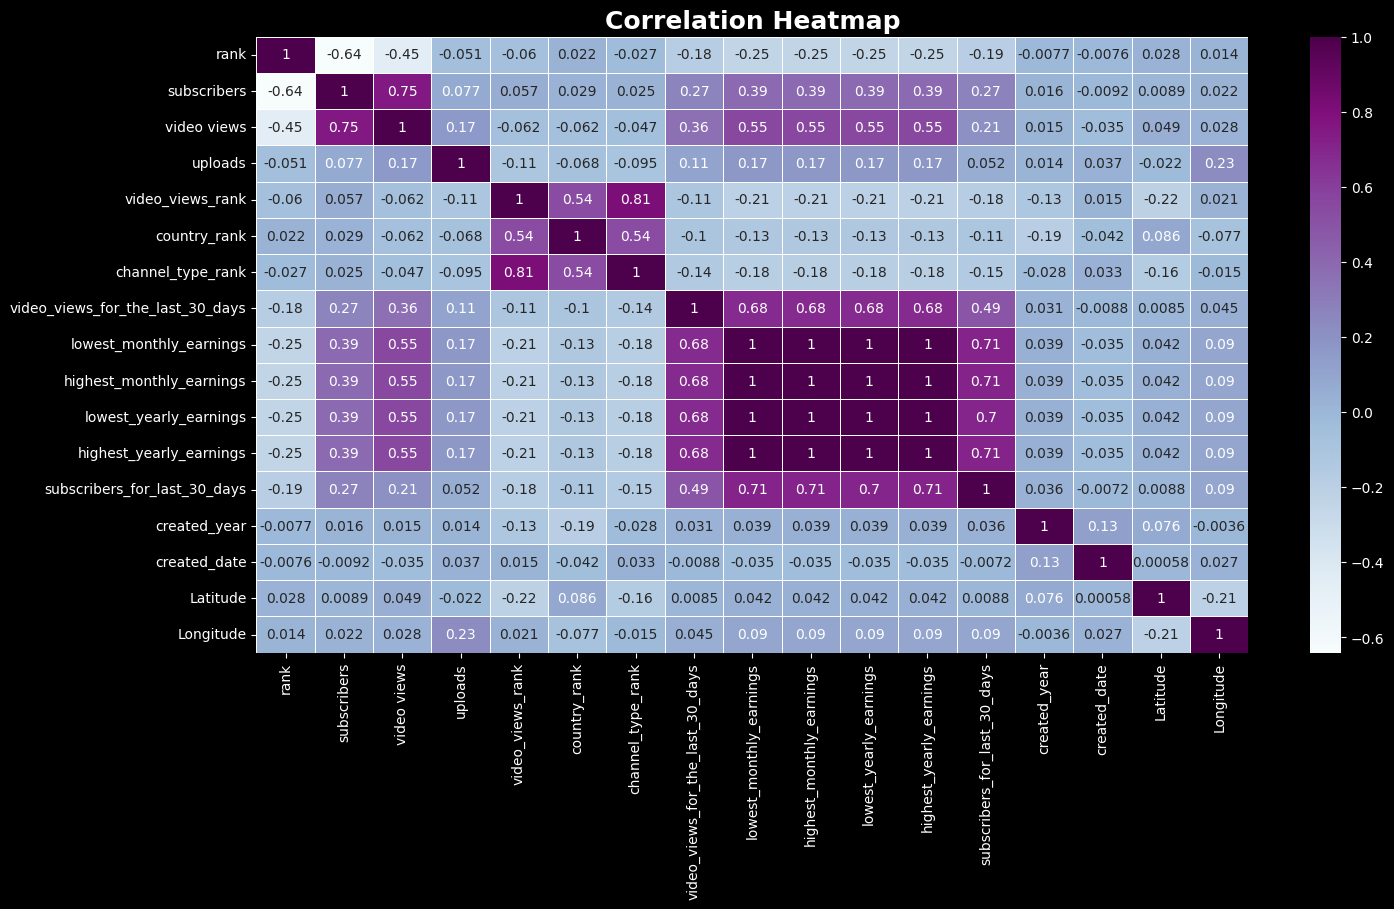

In [113]:
# Correlation heatmap

plt.figure(figsize= (16,8))

# Filter numeric columns only
numeric_df = df.select_dtypes(include=[float, int])

sns.heatmap(
    numeric_df.corr(),
    annot= True,
    cmap="BuPu",
    linewidths=0.5
)

plt.title("Correlation Heatmap", fontsize=18, weight='bold')
plt.show()

**Key Insights from the Correlation Heatmap**

1. **Subscribers and Views:** Strong positive correlation (0.75) between subscribers and video views, indicating that more subscribers lead to higher views.

2. **Earnings Consistency:** Perfect correlation between monthly and yearly earnings metrics, showing that high monthly earnings translate to high yearly earnings.

3. **Channel Rankings:** video_views_rank and channel_type_rank are highly correlated (0.81), meaning top-viewed channels are also top-ranked in their category.

4. **Recent Growth:** subscribers_for_last_30_days is moderately correlated with total earnings (0.7), indicating recent subscriber growth impacts earnings.

5. **Minimal Geographic Influence:** Latitude and Longitude show little correlation with other metrics, suggesting geography has minimal impact on core metrics.







### 4.2 Number of Channels created in each year

In [28]:
channels_in_year = df['created_year'].value_counts().reset_index()
channels_in_year.columns = ['Year', 'Created Channels']

# Sorting df by Year
channels_in_year= channels_in_year.sort_values(by = 'Year', ascending = True) 

# drop Year 0 and Year 1970 
channels_in_year= channels_in_year.drop(axis= 0, index=[17, 19]).reset_index(drop=True)

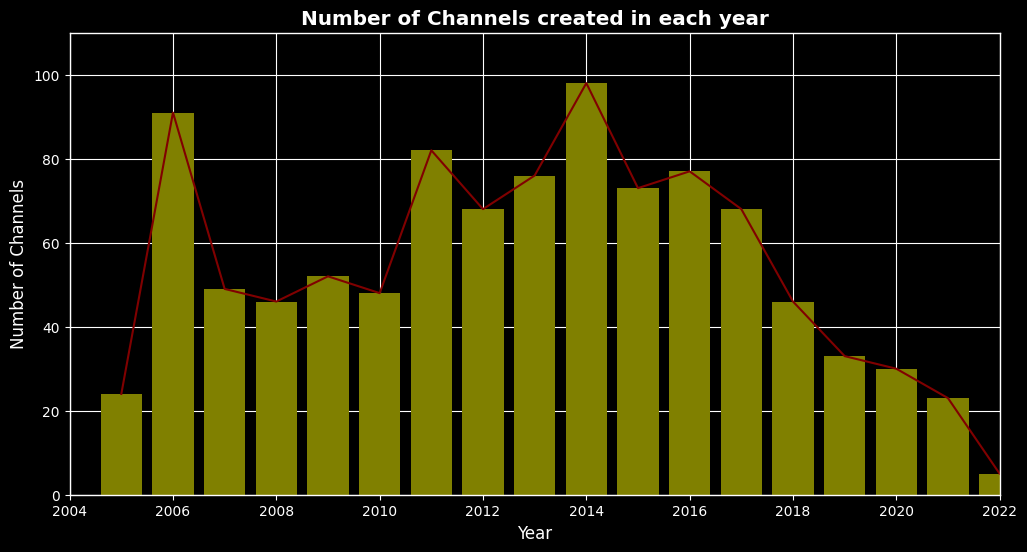

In [106]:
plt.figure(figsize=(12,6))
plt.bar(channels_in_year['Year'], channels_in_year['Created Channels'], color = 'olive')

# Define range for values in axis
plt.ylim(0,110)
plt.xlim(2004,2022)

plt.title("Number of Channels created in each year", weight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Channels')

plt.plot(channels_in_year['Year'], channels_in_year['Created Channels'], color ='maroon') 

**Observation** 

The bar chart illustrates number of channels created in each year from 2005 to 2022. 

Here are some highlights:

1. Quite a sharp increase in 2006 followed by a significant decrease in the next year

2. More stablized period from 2007 to 2010

3. Another dramatic increase in 2011 followed by a drop in the next year

4. It is intresting to note that the year 2014 is the Pick of the chart

5. In the next eight years (2015-2022), the rate of new Channels has gradually decrease and reached the lowest rate in 2022.

### 4.3 Distributaion of Channels by type

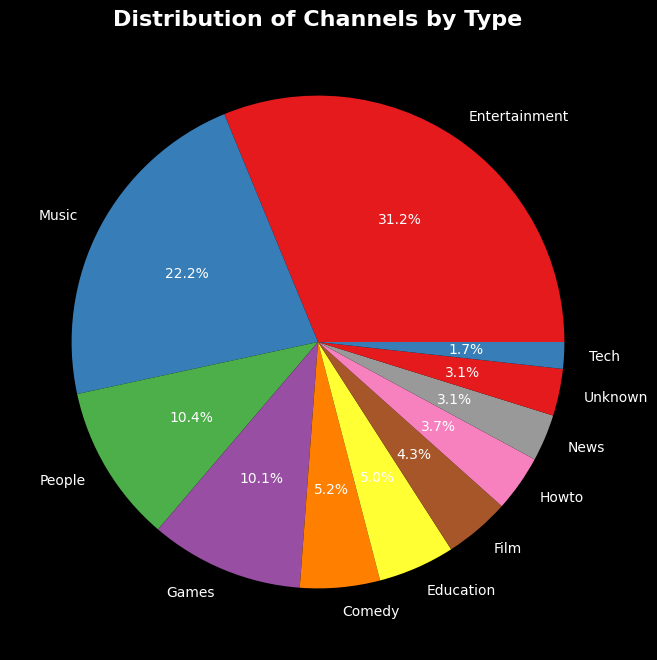

In [108]:
# Data preparation
channel_distribution = df['channel_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(channel_distribution[:-4], labels=channel_distribution.index[:-4], autopct='%1.1f%%', colors = sns.color_palette('Set1'))

# Add title
plt.title("Distribution of Channels by Type", fontsize=16, weight='bold')

# Display the chart
plt.show()

**Observation**

1. From the pie chart it is clear that YouTube users predominantly attend the platform for Entertainment purposes.

2. In broader sense, to interpret more precisely, we can call 'Entertainment, Music, Games, Comedy, Film' as all-Entertainments. and 'Education,  Howto' as all-Educations

3. all-Entertainmnets forms the major chunk of the pie chart

4. all-Educations stands as minor chunk of the pie chart

### 4.4 Distribution of Channels by Country : Top-10

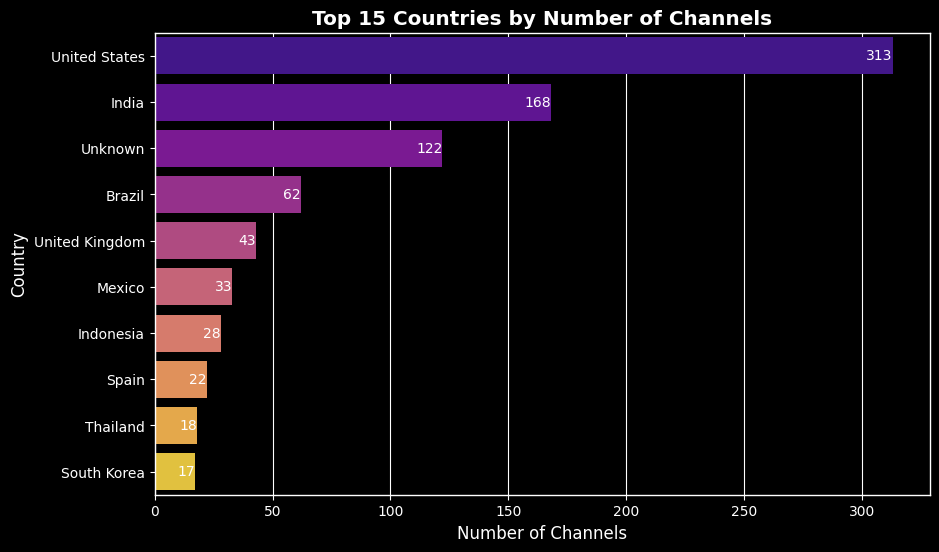

In [124]:
# Prepare data: Count the number of channels by country and select the top 10
country_distribution = df['Country'].value_counts().head(10)

# Plotting a horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=country_distribution.values, y=country_distribution.index, palette="plasma")
plt.title("Top 15 Countries by Number of Channels", weight = 'bold')
plt.xlabel('Number of Channels')
plt.ylabel('Country')

# Adding value labels for each bar
for index, value in enumerate(country_distribution.values):
    plt.text(value, index, f'{value}', va='center', ha='right', color="white")

plt.show()

**Observation**

From the bar graph it is clear that

1. United States has the highest number of YouTubers

2. India is in second place by a considerable margin

3. Due to the fact that Unknown countries are ranked third, it seems that they have overshadowed the results of the survey.

### 4.5 Distribution of Youtube Channels by country using world-map

In [118]:
import plotly.express as px

# Get the count of channels by country
country_data = df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Channel Count']  

# Create a choropleth map
fig = px.choropleth(country_data,
                    locations="Country", 
                    locationmode='country names',  
                    color="Channel Count",  
                    template='plotly_dark',
                    hover_name="Country",  
                    color_continuous_scale="Viridis",  
                    title="Distribution of YouTube Channels by Country")

# Show the map
fig.show()


### 4.6 Top 10 YouTube Channels

/var/folders/35/m8ctsmbx57dbbftldlsf1xyc0000gn/T/ipykernel_33190/1602651612.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<function matplotlib.pyplot.show(close=None, block=None)>

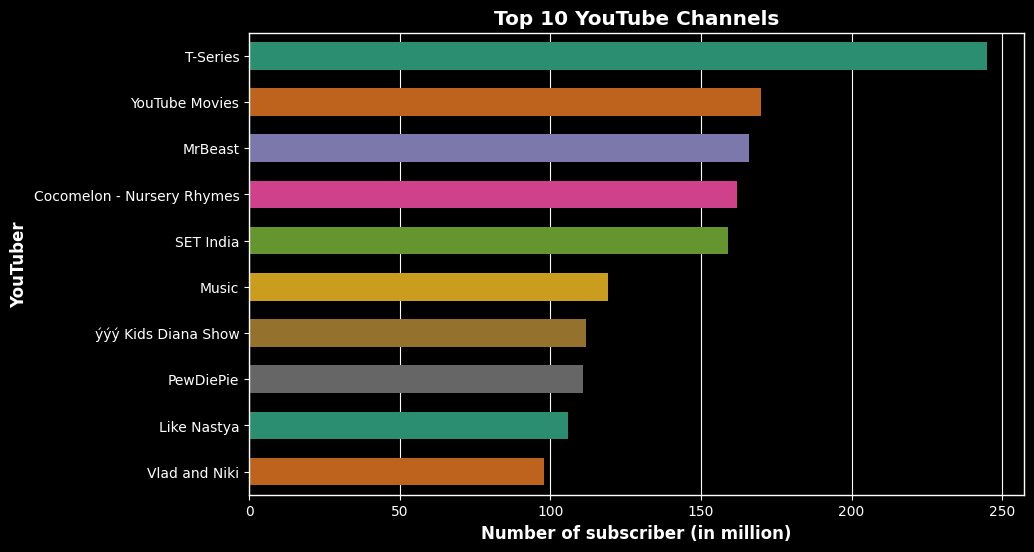

In [114]:
# Prepare data: Get top 10 YouTube channels by subscribers
top_channels = df[['Youtuber', 'subscribers']].sort_values(by='subscribers', ascending=False).head(10)
top_channels['subscribers'] = (top_channels['subscribers']/1000000).astype(int)

# Plotting a horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x = top_channels['subscribers'], y = top_channels['Youtuber'], palette='Dark2', width=0.6)
plt.title('Top 10 YouTube Channels', weight = 'bold')
plt.xlabel('Number of subscriber (in million)', weight = 'bold')
plt.ylabel('YouTuber', weight = 'bold')

plt.show

**Key Insights**

1. **T-Series Dominance**: T-Series leads with nearly **250 million subscribers**, showcasing the global appeal of Bollywood music.

2. **Popular Content Types**: The top 10 include **music, entertainment, and kids' channels**, indicating high demand for these genres.

3. **Indian Content‚Äôs Reach**: T-Series and SET India highlight the popularity of Indian content globally.

4. **Influential Creators**: Channels like **MrBeast** and **PewDiePie** demonstrate the impact of individual creators.

5. **Kids' Content Demand**: Nearly half of the top channels cater to children, showing YouTube‚Äôs role in engaging young audiences.

Overall, music, entertainment, and kids' content dominate YouTube‚Äôs top channels by subscribers.

#### 4.7 Does the content (characters) in the names of YouTube channels influence user views?

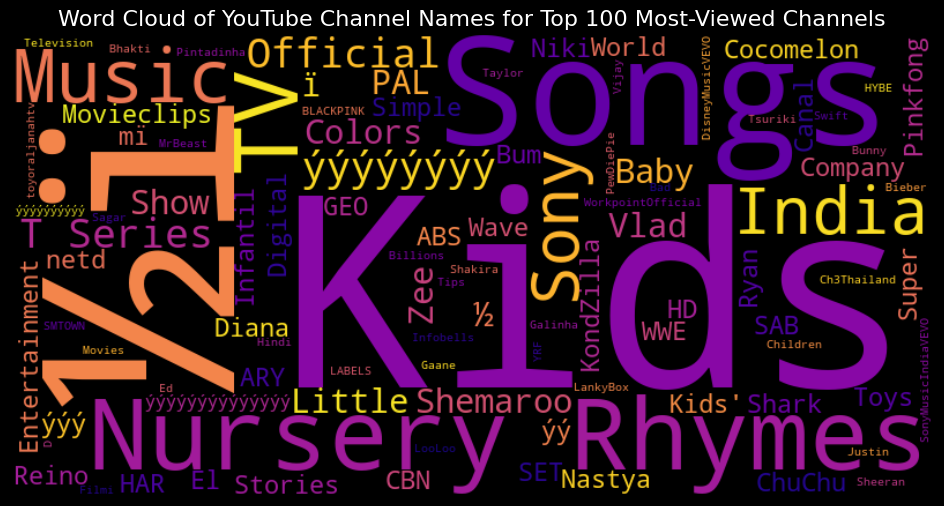

In [119]:
from wordcloud import WordCloud

# Filter the top 100 channels by views to focus on the most popular channels
top_channels = df.sort_values(by='video views', ascending=False).head(100)

# Combine all YouTube channel names into a single string for the word cloud
text = " ".join(name for name in top_channels['Youtuber']) 

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma', 
                      max_words=100, contour_color='steelblue', contour_width=1).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of YouTube Channel Names for Top 100 Most-Viewed Channels", fontsize=16, color='white')
plt.show()


The word cloud reveals key insights:

1. Children‚Äôs Content: Words like "Kids," "Nursery," and "Rhymes" dominate, highlighting the popularity of children‚Äôs channels with songs and educational content.

2. Music and Entertainment: Keywords such as "Music," "Songs," and "TV" indicate that music and general entertainment channels attract significant viewership.

3. Regional Appeal: Terms like "India" and "Hindi" point to strong viewership from regional and language-specific content, especially from India.

4. Big Brands: Channels from major brands like "Sony," "T Series," and "Zee" underscore the success of official, branded content on YouTube.

### 4.8 Relationship between Subscribers & Video Views

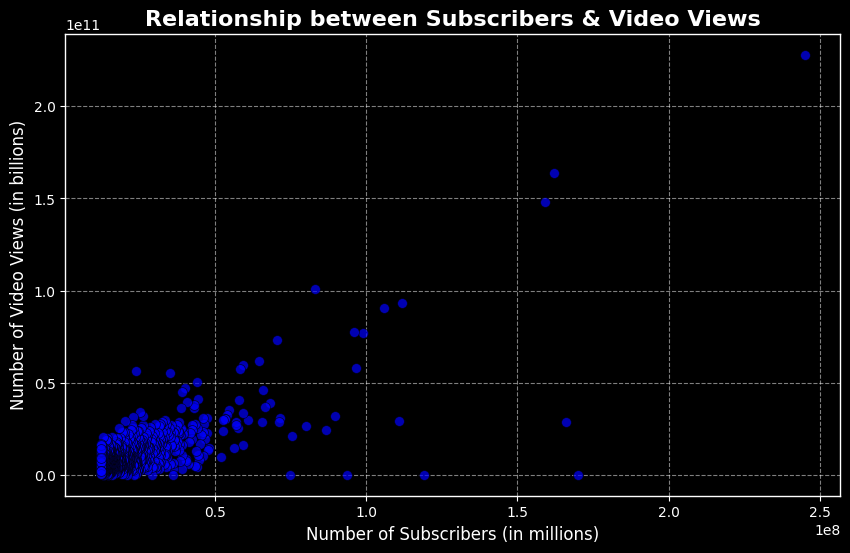

In [121]:
# Setting up the figure
plt.figure(figsize=(10, 6))

# Scatter plot for Subscribers vs. Video Views
sns.scatterplot(data=df, x='subscribers', y='video views', color='blue', edgecolor='black', s=50, alpha=0.7)

plt.title("Relationship between Subscribers & Video Views", fontsize=16, weight='bold')
plt.xlabel("Number of Subscribers (in millions)", fontsize=12)
plt.ylabel("Number of Video Views (in billions)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()


**Observation**

there is a strong positive correlation between no. of Subscribers and total Video Views.

### 4.9 Relationship between Video Views & Highest Yearly Earning

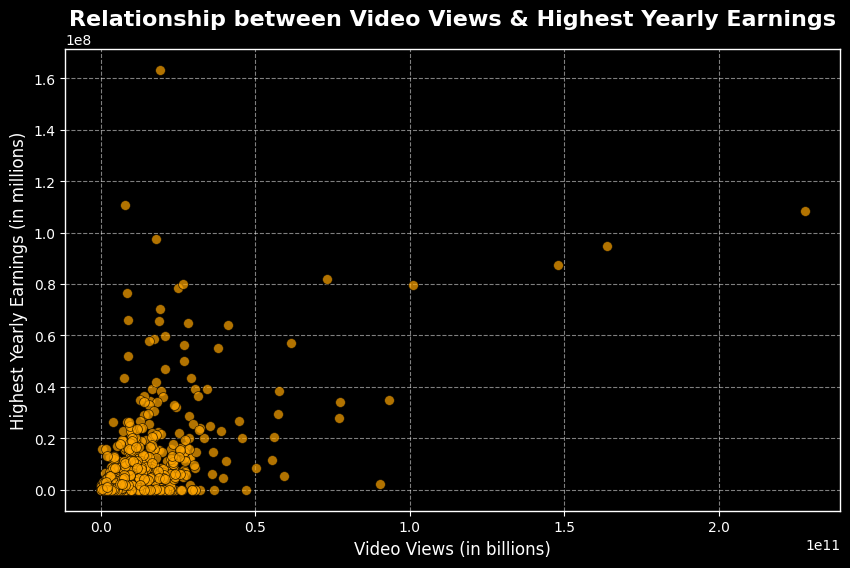

In [122]:
plt.figure(figsize=(10, 6))

# Scatter plot for Video Views vs. Highest Yearly Earnings
sns.scatterplot(data=df, x='video views', y='highest_yearly_earnings', color='orange', edgecolor='black', s=50, alpha=0.7)

plt.title("Relationship between Video Views & Highest Yearly Earnings", fontsize=16, weight='bold')
plt.xlabel("Video Views (in billions)", fontsize=12)
plt.ylabel("Highest Yearly Earnings (in millions)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()


**Observation**

This scatter make it clear that higher total Video View does not guarantee higher income. We can list several possible reasons:

1. The lenght of videos has an impact on earning

2. It is crucial to enable Ads on videos

### 4.10 Relationship between Video Views & no. of Uploads

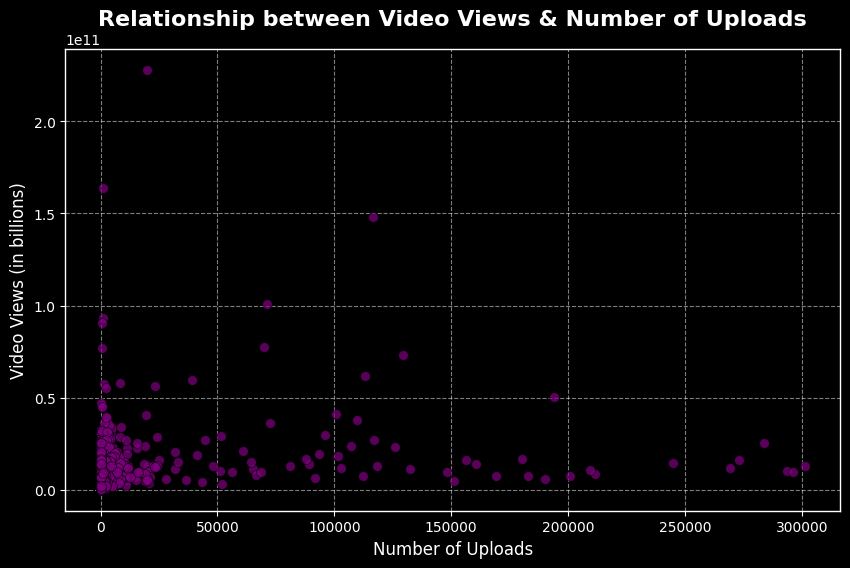

In [123]:
plt.figure(figsize=(10, 6))

# Scatter plot for Video Views vs. Number of Uploads
sns.scatterplot(data=df, x='uploads', y='video views', color='purple', edgecolor='black', s=50, alpha=0.7)

plt.title("Relationship between Video Views & Number of Uploads", fontsize=16, weight='bold')
plt.xlabel("Number of Uploads", fontsize=12)
plt.ylabel("Video Views (in billions)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5) 
plt.show()


**Observation**

Uploading tons of videos does not result in higher Video Views. Several possible reasons might be:

1. Quality of contents plays an essential role in attracting viewers

2. Defining right targets is crusial

3. Continuity is more important than uploading a lot in a short time

4. Adopting effective marketing strategies is a must

## Brief Conclusion ¬∂

1. 2006, 2011, 2014 are shown to be the years in which higher number of YouTube Channels were created.

2. From 2018 to the last year of this survey (2022), the number of channels created has decreased drastically.

3. There is strong positive correlation between Subscribers and Video Views

4. There is a moderate positive correlation between Video Views and all four columns of Earnings(H/L monthly and H/L yearly)

5. There is a weak possitive correlation between number of uploads and subscribers / Video Views / Earning

6. YouTube users predominantly attend the platform for Entertainment purposes

7. Educational Categories (e.g. Education, HowTo) stand in minority of users' motivations

8. United States has the highest number of YouTubers and India stands in the second place

9. Higher total Video View does not guarantee higher income